In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

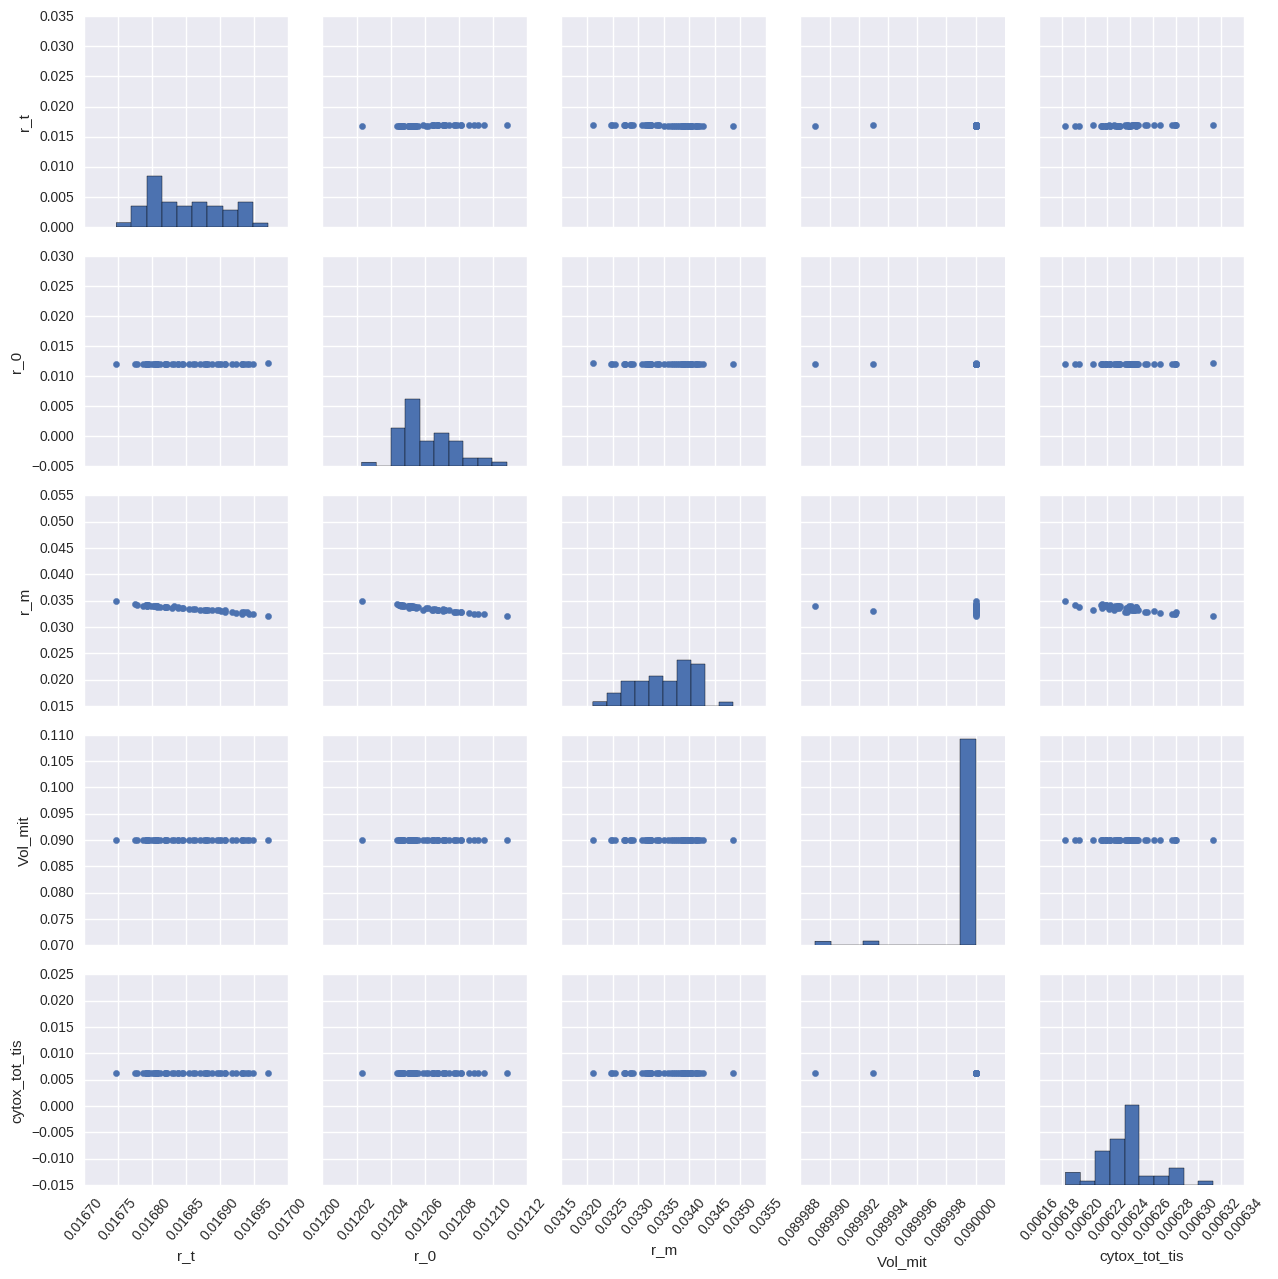

In [5]:
df = pd.read_json('all_opt.json', orient='index').sort_index()
g = sns.PairGrid(df,vars=['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
for ax in g.axes.flat:
    ax.ticklabel_format(useOffset=False)
    for label in ax.get_xticklabels():
        label.set_rotation(50)

## Get Distances ##

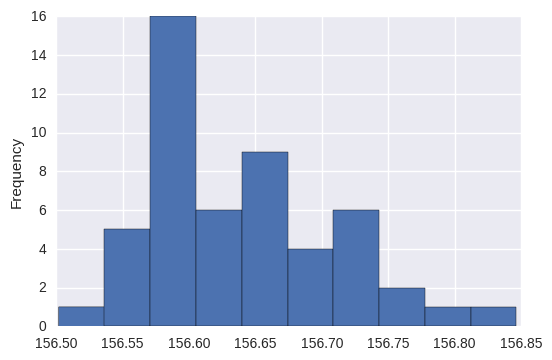

In [12]:
logs = [f for f in os.listdir('.') if f[-3:]=='log']
for ix in range(len(logs)):
    with open('optimisation_{}.log'.format(ix)) as f:
        c = f.readlines()
        df.loc[ix,'Distance'] = float(c[-7][-11:])

plt.ticklabel_format(useOffset=False)        
df['Distance'].plot(kind='hist', bins=10)

In [4]:
with open('opts_and_dist.json','w') as jsonf:
    print(df.to_json(orient='index'), file=jsonf)